<a href="https://colab.research.google.com/github/PranavKumarAV/MNIST/blob/main/Intern_Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **For MNIST data without Data Augumentation**


In [ ]:
import tensorflow
from keras.datasets.mnist import load_data
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import numpy as np
import random

In [ ]:
(X_train, Y_train), (X_test, Y_test) = load_data()
X_train = np.reshape(X_train, (X_train.shape[0], 28, 28, 1))
X_test = np.reshape(X_test, (X_test.shape[0],28, 28, 1))

# re-scale the image data to values between (0.0,1.0]
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

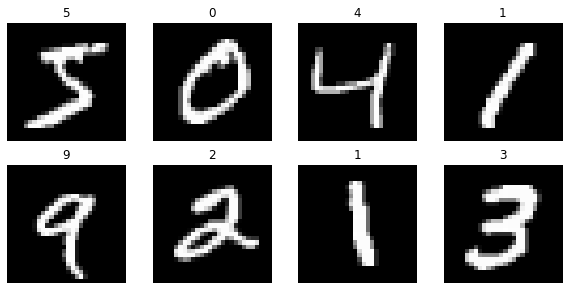

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(8):
  k = random.randint(0,60000)
  plt.subplot(440 + 1 + i)
  plt.imshow(X_train[i].reshape(28,28),cmap='gray')
  plt.axis("off")
  plt.title(int(Y_train[i]))

In [ ]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same',
                     input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))    
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.compile(loss=tensorflow.keras.losses.sparse_categorical_crossentropy,
              optimizer=tensorflow.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0

In [ ]:
results = model.fit(X_train, Y_train, 
                    batch_size=250,epochs=25,
                    verbose=1,
                    validation_data=(X_test,Y_test))

Epoch 1/25
240/240 [==============================] - 110s 395ms/step - loss: 0.6293 - accuracy: 0.8088 - val_loss: 0.0570 - val_accuracy: 0.9823
Epoch 2/25
240/240 [==============================] - 94s 393ms/step - loss: 0.0595 - accuracy: 0.9822 - val_loss: 0.0327 - val_accuracy: 0.9891
Epoch 3/25
240/240 [==============================] - 94s 392ms/step - loss: 0.0333 - accuracy: 0.9897 - val_loss: 0.0329 - val_accuracy: 0.9890
Epoch 4/25
240/240 [==============================] - 94s 390ms/step - loss: 0.0253 - accuracy: 0.9921 - val_loss: 0.0306 - val_accuracy: 0.9902
Epoch 5/25
240/240 [==============================] - 94s 390ms/step - loss: 0.0222 - accuracy: 0.9930 - val_loss: 0.0230 - val_accuracy: 0.9925
Epoch 6/25
240/240 [==============================] - 94s 390ms/step - loss: 0.0160 - accuracy: 0.9951 - val_loss: 0.0305 - val_accuracy: 0.9904
Epoch 7/25
240/240 [==============================] - 93s 389ms/step - loss: 0.0131 - accuracy: 0.9958 - val_loss: 0.0317 - val_a

In [ ]:
print(results.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


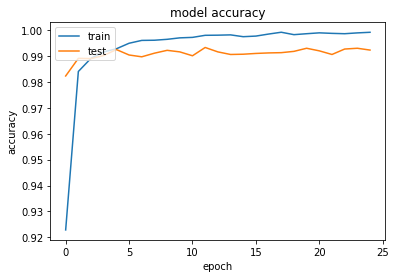

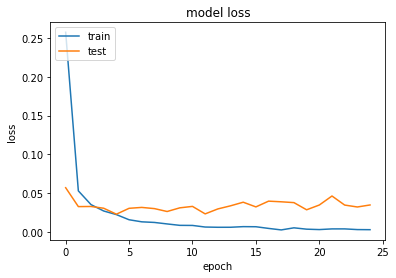

In [ ]:
# For accuracy
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# For loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# With Data augumentation

In [ ]:
train_data = ImageDataGenerator(rotation_range = 25,
                             width_shift_range = 0.2,
                             height_shift_range = 0.2,
                             zoom_range=0.2,
                             shear_range=0.2)

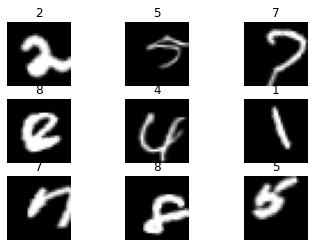

In [ ]:
for X_batch, y_batch in train_data.flow(X_train, Y_train, batch_size=9):
# create a grid of 3x3 images
  for i in range(0, 9):
    plt.subplot(331 + i)
    plt.imshow(X_batch[i].reshape(28,28),cmap='gray')
    plt.axis('off')
    plt.title(int(y_batch[i]))
  break

In [ ]:
results_aug = model.fit_generator(train_data.flow(X_train, Y_train, batch_size=250),
                                  validation_data = (X_test, Y_test), steps_per_epoch = len(X_train) // 250,
                                  epochs = 25)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/25
240/240 [==============================] - 112s 463ms/step - loss: 0.2352 - accuracy: 0.9301 - val_loss: 0.0313 - val_accuracy: 0.9894
Epoch 2/25
240/240 [==============================] - 111s 461ms/step - loss: 0.0889 - accuracy: 0.9722 - val_loss: 0.0272 - val_accuracy: 0.9912
Epoch 3/25
240/240 [==============================] - 110s 459ms/step - loss: 0.0683 - accuracy: 0.9784 - val_loss: 0.0295 - val_accuracy: 0.9909
Epoch 4/25
240/240 [==============================] - 111s 460ms/step - loss: 0.0606 - accuracy: 0.9820 - val_loss: 0.0206 - val_accuracy: 0.9932
Epoch 5/25
240/240 [==============================] - 110s 459ms/step - loss: 0.0553 - accuracy: 0.9827 - val_loss: 0.0212 - val_accuracy: 0.9939
Epoch 6/25
240/240 [==============================] - 110s 458ms/step - loss: 0.0516 - accuracy: 0.9843 - val_loss: 0.0226 - val_accuracy: 0.9925
Epoch 7/25
240/240 [==============================] - 110s 458ms/step - loss: 0.0485 - accuracy: 0.9843 - val_loss: 0.0250 -

In [ ]:
print(results_aug.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


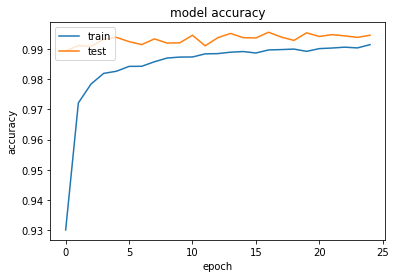

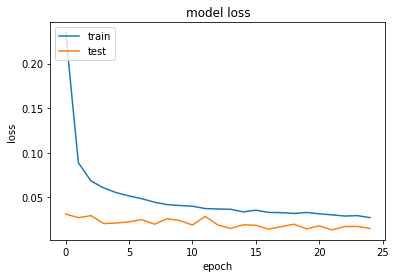

In [ ]:
# For accuracy
plt.plot(results_aug.history['accuracy'])
plt.plot(results_aug.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# For loss
plt.plot(results_aug.history['loss'])
plt.plot(results_aug.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()